## Flight Delay Analysis US 2015 – Exploratory Data Analysis & Predictive Modeling
In this project, we explore and analyze flight delay patterns in the United States using the 2015 US Department of Transportation Flight Dataset. Flight delays are a major inconvenience for travelers and a significant operational challenge for airlines and airports. By understanding the factors that contribute to delays, we can help airlines optimize scheduling, improve customer experience, and reduce economic losses.

The goal of this project is twofold:

Perform comprehensive Exploratory Data Analysis (EDA) to uncover trends, patterns, and correlations in flight delay behavior across airlines, airports, times of day, and days of the week.

Build predictive models to classify whether a flight will be delayed based on various features such as departure time, carrier, route, distance, and delay history.

Using tools like pandas, seaborn, and scikit-learn, we will clean and preprocess the dataset, visualize key insights, and compare the performance of different machine learning classifiers such as Logistic Regression, Decision Trees, and Random Forests. This combined analytical and predictive approach provides actionable insights into flight delay trends and helps build a foundation for smarter, data-driven aviation strategies.

In [1]:
#Install and import libraries
!pip install kaggle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from kaggle.api.kaggle_api_extended import KaggleApi

First, let's use the Kaggle API to authenticate your account and download the "US DOT Flight Delays" dataset into a local folder named flight_data, extracting the contents automatically.

In [2]:
# Authenticate and download dataset
api = KaggleApi()
api.authenticate()
api.dataset_download_files('usdot/flight-delays', path='flight_data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/usdot/flight-delays


Read the downloaded flights.csv file into a Pandas DataFrame and displays the first 5 rows to preview the structure and contents of the dataset.

In [3]:
# Load the data
df = pd.read_csv("flight_data/flights.csv")
df.head()

C:\Users\slind\AppData\Local\Temp\ipykernel_22436\2618477956.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flight_data/flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In the following cell, we begin our Flight Delay Analysis US 2015 project by examining the structure of the dataset. We use .shape, .info(), and .describe() to understand the number of records, data types, and basic statistics—laying the groundwork for cleaning and exploratory data analysis (EDA).

In [4]:
# Basic data inspection
print(df.shape)
print(df.info())
df.describe()

(5819079, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED          

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


## Data cleaning
We begin data cleaning by filtering out canceled and diverted flights, since our goal is to predict delays for flights that were actually completed. This step ensures the reliability of our analysis by focusing only on valid operational flights.

In [5]:
# Handle missing values and categorize flight status
canceled_flights = df[df['CANCELLED'] == 1.0]
diverted_flights = df[df['DIVERTED'] == 1.0]
cleaned_flights = df.drop(canceled_flights.index)
cleaned_flights = cleaned_flights.drop(diverted_flights.index)
cleaned_flights.reset_index(drop=True, inplace=True)

Next, we handle missing values in DEPARTURE_DELAY and ARRIVAL_DELAY by filling them with 0, assuming no delay. We then engineer a new binary feature, IS_DELAYED, where a flight is considered delayed if its arrival delay exceeds 15 minutes, in line with the U.S. Department of Transportation’s standard.

In [6]:
# Feature engineering
cleaned_flights['DEPARTURE_DELAY'] = cleaned_flights['DEPARTURE_DELAY'].fillna(0)
cleaned_flights['ARRIVAL_DELAY'] = cleaned_flights['ARRIVAL_DELAY'].fillna(0)
cleaned_flights['IS_DELAYED'] = cleaned_flights['ARRIVAL_DELAY'] > 15
cleaned_flights['IS_DELAYED'] = cleaned_flights['IS_DELAYED'].astype(int)

## Exploratory Data Analysis
In this project, we use EDA to better understand flight delay behaviors in the US for 2015—such as which airlines, times, or locations are most associated with delays—before building predictive models.

We calculate and visualize the average flight delay rate by airline by grouping flights on the AIRLINE column and computing the mean of the binary IS_DELAYED flag. The resulting bar plot highlights which carriers had the highest proportion of delayed flights in 2015, revealing significant differences in airline punctuality performance.

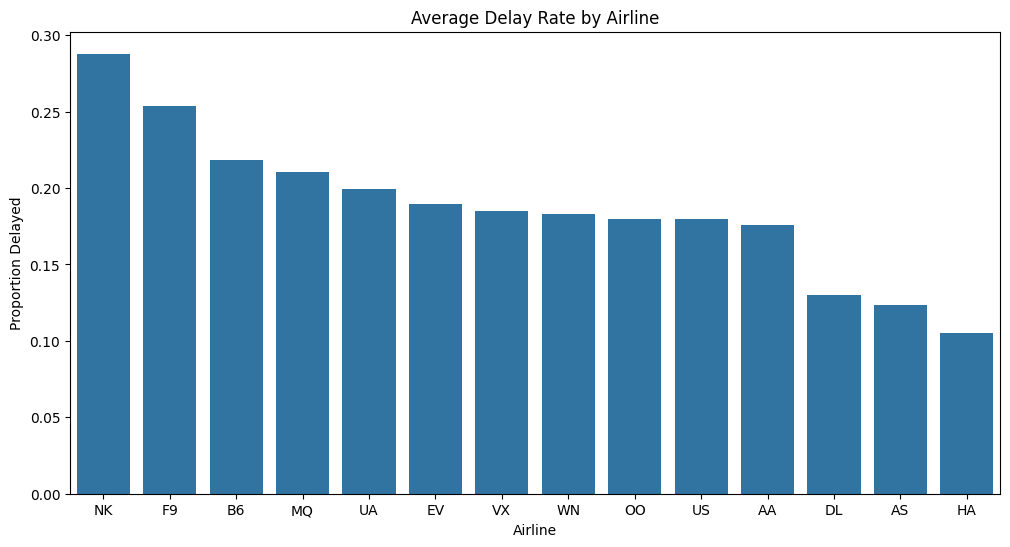

In [7]:
# Delay rate per airline
plt.figure(figsize=(12, 6))
delay_rate = cleaned_flights.groupby('AIRLINE')['IS_DELAYED'].mean().sort_values(ascending=False)
sns.barplot(x=delay_rate.index, y=delay_rate.values)
plt.title('Average Delay Rate by Airline')
plt.ylabel('Proportion Delayed')
plt.xlabel('Airline')
plt.show()

We analyze the delay rate at the 10 busiest origin airports by calculating the proportion of delayed flights for each. This bar plot helps identify airports with the highest delay tendencies, providing insights into potential operational or congestion-related challenges at specific hubs.

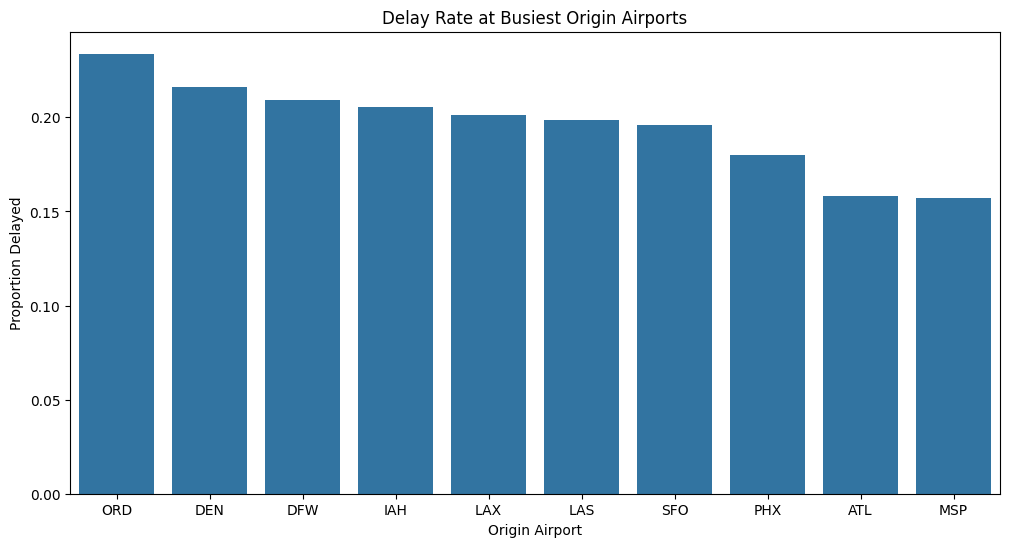

In [8]:
# Top 10 busiest origin airports and their delay rates
top_airports = cleaned_flights['ORIGIN_AIRPORT'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.barplot(
    data=cleaned_flights[cleaned_flights['ORIGIN_AIRPORT'].isin(top_airports)]
    .groupby('ORIGIN_AIRPORT')['IS_DELAYED'].mean().reset_index()
    .sort_values('IS_DELAYED', ascending=False),
    x='ORIGIN_AIRPORT', y='IS_DELAYED'
)
plt.title('Delay Rate at Busiest Origin Airports')
plt.ylabel('Proportion Delayed')
plt.xlabel('Origin Airport')
plt.show()

We visualize flight delays by each day of the week using a countplot split by the IS_DELAYED status. This helps us detect weekly patterns in delay frequency, revealing if certain days (e.g., weekends or weekdays) are more prone to delays.

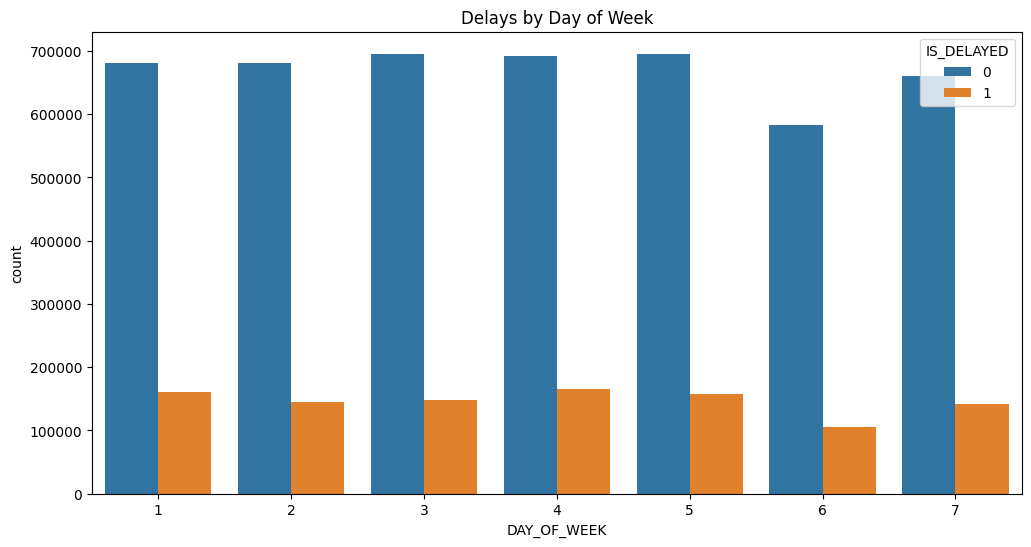

In [9]:
 Delays by Day of Week
plt.figure(figsize=(12, 6))
sns.countplot(x='DAY_OF_WEEK', hue='IS_DELAYED', data=cleaned_flights)
plt.title('Delays by Day of Week')
plt.show()

We generate a scatterplot to explore the relationship between scheduled departure times and delay status (IS_DELAYED). By plotting a random sample of 10,000 flights, we aim to identify any patterns or time-of-day effects that may contribute to higher chances of delays.

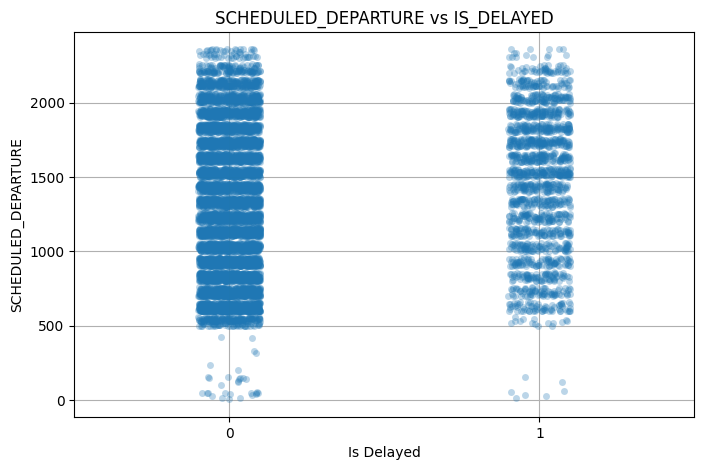

In [10]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='IS_DELAYED', y='SCHEDULED_DEPARTURE', data=cleaned_flights.sample(10000), jitter=True, alpha=0.3)
plt.title("SCHEDULED_DEPARTURE vs IS_DELAYED")
plt.xlabel("Is Delayed")
plt.ylabel("SCHEDULED_DEPARTURE")
plt.grid(True)
plt.show()

This scatterplot visualizes the relationship between DEPARTURE_DELAY and the binary delay outcome (IS_DELAYED). We observe that flights labeled as delayed (IS_DELAYED = 1) tend to have significantly higher departure delays, supporting its relevance as a strong predictor in delay modeling.

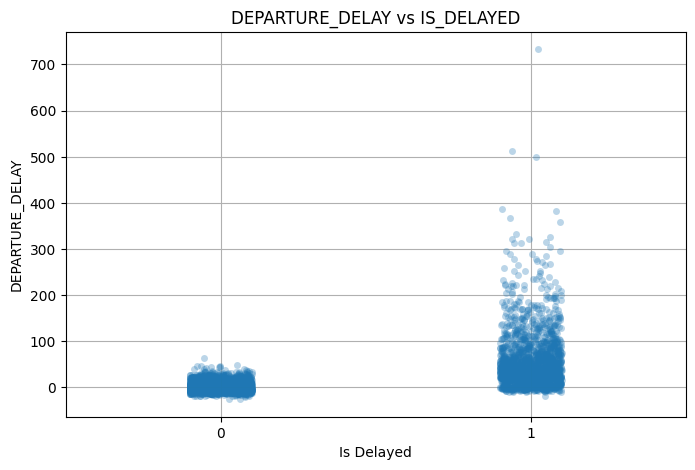

In [11]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='IS_DELAYED', y='DEPARTURE_DELAY', data=cleaned_flights.sample(10000), jitter=True, alpha=0.3)
plt.title("DEPARTURE_DELAY vs IS_DELAYED")
plt.xlabel("Is Delayed")
plt.ylabel("DEPARTURE_DELAY")
plt.grid(True)
plt.show()

This scatterplot shows the distribution of SCHEDULED_ARRIVAL times for both delayed and non-delayed flights (IS_DELAYED). The pattern appears fairly uniform across both groups, suggesting that scheduled arrival time alone may not be a strong indicator of whether a flight will be delayed.

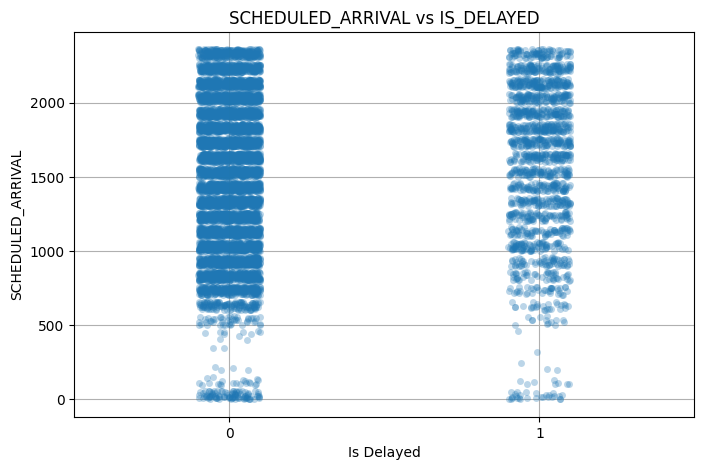

In [12]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='IS_DELAYED', y='SCHEDULED_ARRIVAL', data=cleaned_flights.sample(10000), jitter=True, alpha=0.3)
plt.title("SCHEDULED_ARRIVAL vs IS_DELAYED")
plt.xlabel("Is Delayed")
plt.ylabel("SCHEDULED_ARRIVAL")
plt.grid(True)
plt.show()

This scatterplot visualizes the relationship between ARRIVAL_DELAY and the binary delay label IS_DELAYED. As expected, flights marked as delayed (IS_DELAYED = 1) show a much wider and higher distribution of arrival delays, reinforcing ARRIVAL_DELAY as a strong indicator of delay status.

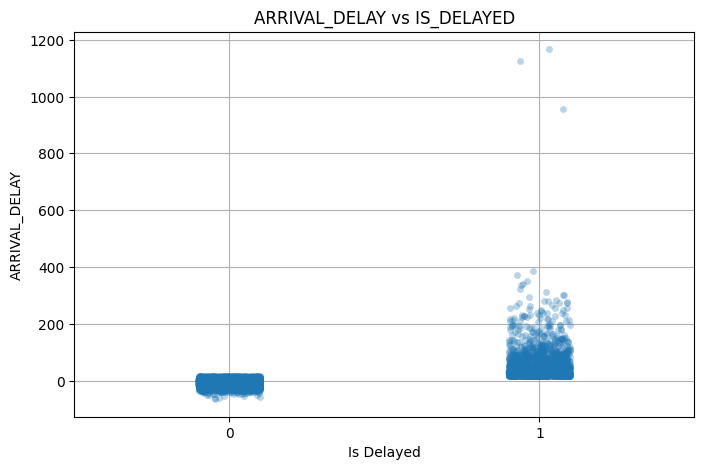

In [13]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='IS_DELAYED', y='ARRIVAL_DELAY', data=cleaned_flights.sample(10000), jitter=True, alpha=0.3)
plt.title("ARRIVAL_DELAY vs IS_DELAYED")
plt.xlabel("Is Delayed")
plt.ylabel("ARRIVAL_DELAY")
plt.grid(True)
plt.show()

This scatterplot illustrates the relationship between AIR_TIME and flight delay status (IS_DELAYED). The distribution appears similar for both delayed and non-delayed flights, suggesting that air time alone does not significantly influence the likelihood of a flight being delayed.

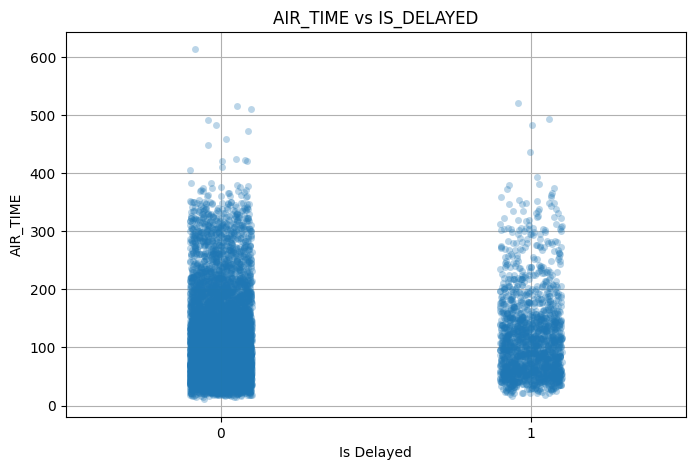

In [14]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='IS_DELAYED', y='AIR_TIME', data=cleaned_flights.sample(10000), jitter=True, alpha=0.3)
plt.title("AIR_TIME vs IS_DELAYED")
plt.xlabel("Is Delayed")
plt.ylabel("AIR_TIME")
plt.grid(True)
plt.show()

This scatterplot shows the relationship between DISTANCE and IS_DELAYED, highlighting how far flights traveled based on their delay status. The visual suggests that flight distance has minimal impact on delay likelihood, as the distributions are similar for both delayed and on-time flights.

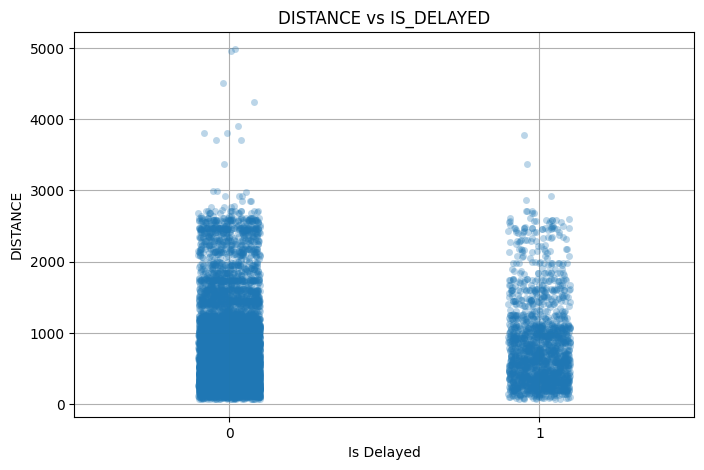

In [15]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='IS_DELAYED', y='DISTANCE', data=cleaned_flights.sample(10000), jitter=True, alpha=0.3)
plt.title("DISTANCE vs IS_DELAYED")
plt.xlabel("Is Delayed")
plt.ylabel("DISTANCE")
plt.grid(True)
plt.show()

## Define Cramér's V Function

In [16]:
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DAY_OF_WEEK']

cramers_results = {}
for col in categorical_cols:
    cm = pd.crosstab(cleaned_flights[col], cleaned_flights['IS_DELAYED'])
    v = cramers_v(cm)
    cramers_results[col] = v

In [17]:
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DAY_OF_WEEK']

for col in categorical_cols:
    confusion_mat = pd.crosstab(cleaned_flights[col], cleaned_flights['IS_DELAYED'])
    v = cramers_v(confusion_mat)
    print(f"Cramér's V between {col} and IS_DELAYED: {v:.3f}")

Cramér's V between AIRLINE and IS_DELAYED: 0.084
Cramér's V between ORIGIN_AIRPORT and IS_DELAYED: 0.092
Cramér's V between DESTINATION_AIRPORT and IS_DELAYED: 0.085
Cramér's V between DAY_OF_WEEK and IS_DELAYED: 0.030


Cramér's V ranges from 0 to 1:

0 → No association

~0.1 → Weak association

~0.3 → Moderate association

~0.5+ → Strong association

This gives you a way to quantitatively measure how strongly non-numeric categorical features relate to flight delays.
Here's an interpretation of the **Cramér’s V results** shown in the image:

---

| Categorical Variable  | Cramér’s V | Interpretation                                                                                                                                                           |
| --------------------- | ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `AIRLINE`             | 0.084      | **Weak association** — The airline has a small effect on whether a flight is delayed. Some airlines may perform slightly better than others, but the influence is minor. |
| `ORIGIN_AIRPORT`      | 0.092      | **Weak association** — The airport of origin has a slightly stronger, yet still weak, impact on delays. This may reflect local congestion or weather patterns.           |
| `DESTINATION_AIRPORT` | 0.085      | **Weak association** — The destination also has a weak relationship with delay likelihood, possibly due to airport-specific factors.                                     |
| `DAY_OF_WEEK`         | 0.030      | **Very weak association** — The day of the week plays a minimal role in determining whether a flight is delayed.                                                         |

---

All four categorical variables exhibit **weak or very weak associations** with delays. This suggests that **other features (e.g., numerical ones like `DEPARTURE_DELAY`, `ARRIVAL_DELAY`) likely carry stronger predictive power** for modeling flight delays.


This bar chart shows that among the categorical features, origin airport has the strongest association with flight delays, followed by destination airport and airline, while day of the week has the weakest link.

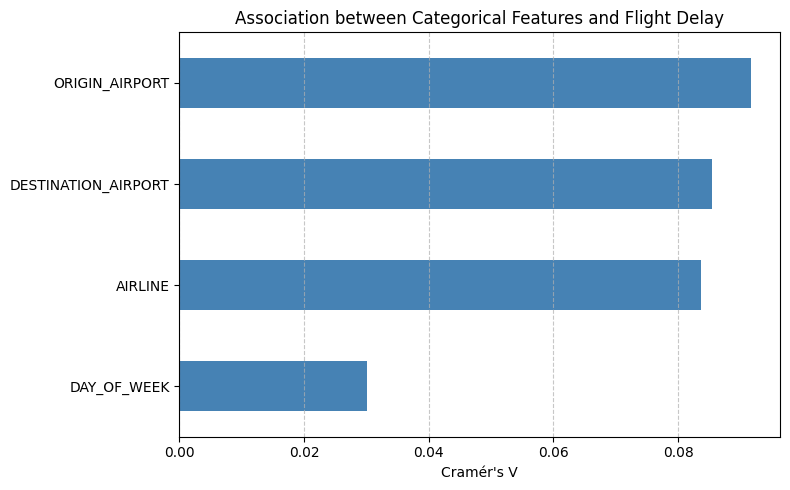

In [18]:
# Convert to DataFrame
cramer_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['Cramér\'s V'])
cramer_df = cramer_df.sort_values(by="Cramér's V", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
cramer_df['Cramér\'s V'].plot(kind='barh', color='steelblue')
plt.xlabel("Cramér's V")
plt.title("Association between Categorical Features and Flight Delay")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

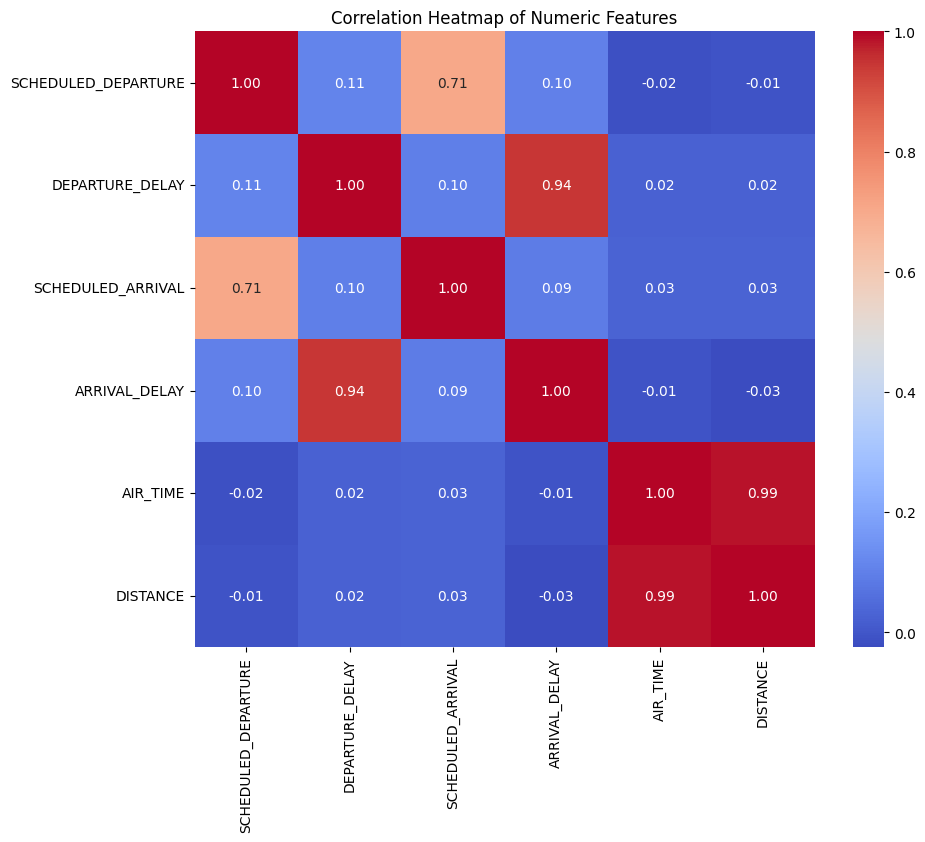

In [19]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numeric_cols = ['SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
                'ARRIVAL_DELAY', 'AIR_TIME', 'DISTANCE']
corr = cleaned_flights[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

This heatmap reveals strong correlations between **departure delay** and **arrival delay** (0.94), as well as between **air time** and **distance** (0.99), indicating logical travel dependencies. Most other features show weak or no correlation.

This KDE plot compares the distribution of departure delays by delay status. Non-delayed flights peak sharply around 0 minutes, while delayed flights show a broader spread with longer delays, indicating a distinct pattern in delay durations.

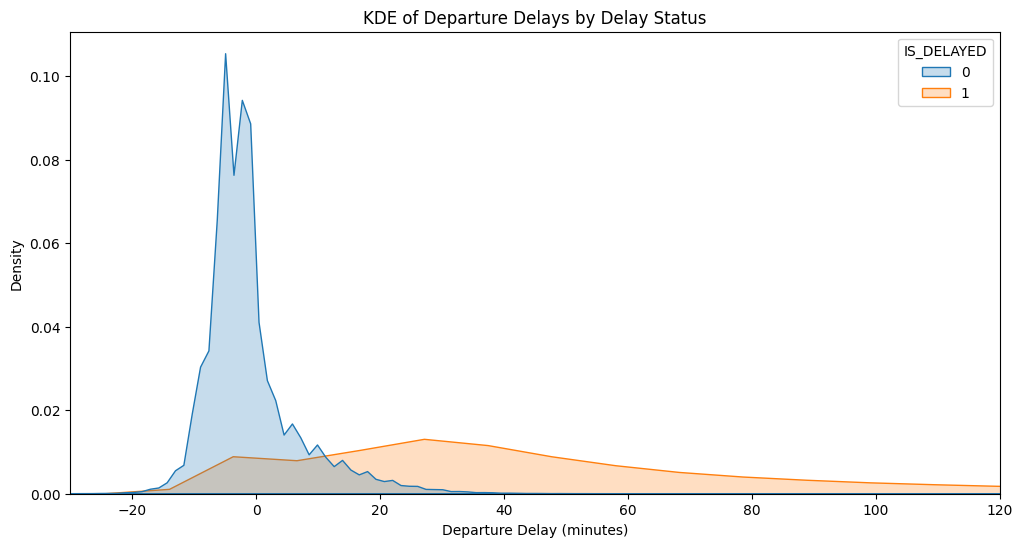

In [20]:
# KDE Plot of Departure Delays
plt.figure(figsize=(12, 6))
sns.kdeplot(data=cleaned_flights, x='DEPARTURE_DELAY', hue='IS_DELAYED', fill=True, common_norm=False)
plt.xlim(-30, 120)  # Trim x-axis for visualization
plt.title('KDE of Departure Delays by Delay Status')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Density')
plt.show()

In [21]:
# Identify your features again
feature_cols = [
    'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
    'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_DELAY',
    'DISTANCE', 'DEPARTURE_TIME'
]

# Sample a smaller DataFrame
sample_df = cleaned_flights.sample(n=100_000, random_state=42)

# Get dummies for categorical variables
X_sample = pd.get_dummies(sample_df[feature_cols], drop_first=True)

# Target
y_sample = sample_df['IS_DELAYED']

In [22]:
# Redefine split (if not already present)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16442
           1       0.90      0.70      0.79      3558

    accuracy                           0.93     20000
   macro avg       0.92      0.84      0.87     20000
weighted avg       0.93      0.93      0.93     20000



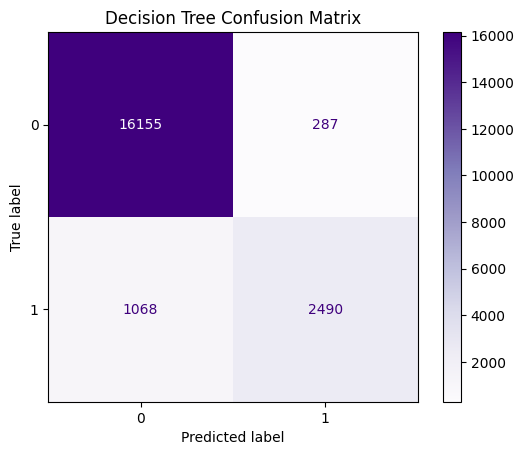

In [23]:
# Train and evaluate a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize and train model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Classification Report
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_dt.plot(cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.grid(False)
plt.show()

We trained a Decision Tree model to predict flight delays, achieving an accuracy of **93%**. While the model performs exceptionally well for on-time flights (precision: 0.94, recall: 0.98), it shows a lower recall of **0.70** for delayed flights, meaning it misses about 30% of actual delays despite good precision (0.90).

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16442
           1       0.90      0.72      0.80      3558

    accuracy                           0.94     20000
   macro avg       0.92      0.85      0.88     20000
weighted avg       0.94      0.94      0.93     20000



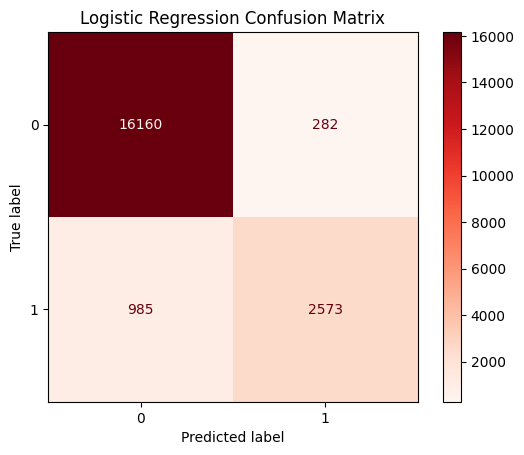

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=1000, solver='liblinear')  # Good for binary classification
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_model.predict(X_test)

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_log, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap='Reds')
plt.title("Logistic Regression Confusion Matrix")
plt.grid(False)
plt.show()

We trained a Logistic Regression model to predict flight delays, achieving a strong **accuracy of 94%**. The model demonstrates high performance for on-time flights (precision: 0.94, recall: 0.98) and improved recall for delayed flights (**0.72**) compared to the Decision Tree, making it slightly better at capturing actual delays while maintaining strong precision (0.90).

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16442
           1       0.00      0.00      0.00      3558

    accuracy                           0.82     20000
   macro avg       0.41      0.50      0.45     20000
weighted avg       0.68      0.82      0.74     20000



C:\Users\slind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\slind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\slind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

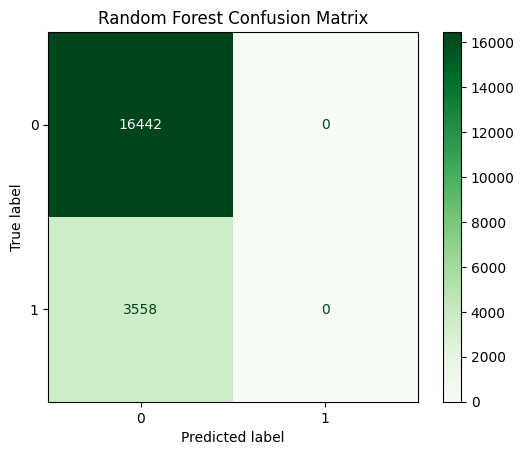

In [25]:
# Train and evaluate a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp.plot(cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.show()

The Random Forest model performs poorly in predicting delays—it **predicts all flights as on-time**. While it shows **100% recall for non-delayed flights**, it fails completely on delayed ones (recall: 0.00), resulting in **0% precision and recall for the positive class**. This model is clearly overfitting or misconfigured and is **not reliable** for flight delay classification.

C:\Users\slind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


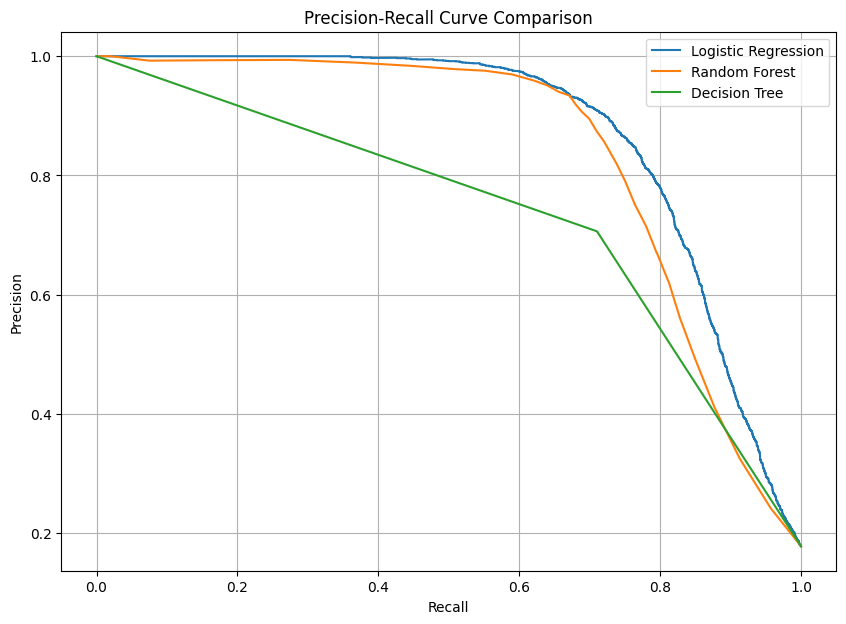

In [26]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Fit models (assuming you already have X_train, X_test, y_train, y_test)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

rf_model = RandomForestClassifier(n_estimators=30, random_state=42)
rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute PR curves
precision_log, recall_log, _ = precision_recall_curve(y_test, y_prob_log)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt)

# Plot all on the same figure
plt.figure(figsize=(10, 7))
plt.plot(recall_log, precision_log, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_dt, precision_dt, label='Decision Tree')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid()
plt.show()

The Precision-Recall Curve comparison shows that:

* **Logistic Regression** (blue) performs the best, maintaining high precision and recall across thresholds—ideal for imbalanced classification like flight delays.
* **Random Forest** (orange) performs slightly worse, though still competitive.
* **Decision Tree** (green) shows the weakest performance with a sharp drop in precision as recall increases.

Overall, **Logistic Regression is the most effective model** for distinguishing delayed flights in this case.

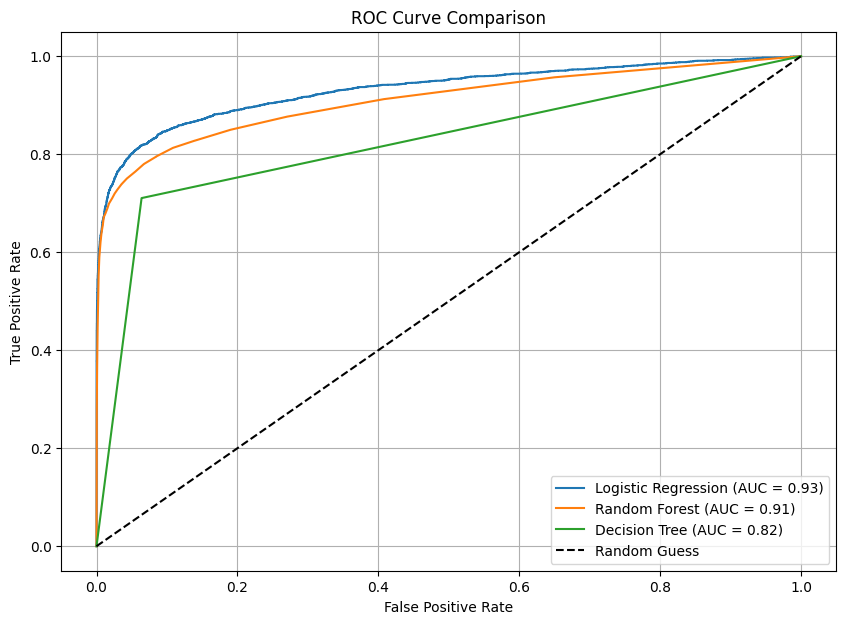

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# AUC Scores
auc_log = roc_auc_score(y_test, y_prob_log)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot all ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The ROC Curve comparison highlights the overall classification performance of the three models:

* **Logistic Regression (AUC = 0.93)** has the best performance, demonstrating strong discriminative power between delayed and non-delayed flights.
* **Random Forest (AUC = 0.91)** performs almost as well, slightly below logistic regression.
* **Decision Tree (AUC = 0.82)** shows the weakest performance among the three, with more false positives for a given true positive rate.

**Conclusion:** Logistic Regression is the top-performing model in both precision-recall and ROC evaluations, making it the most reliable for predicting flight delays.

Based on the exploratory data analysis and model evaluation results, here are key **recommendations** for improving flight delay prediction and operational decision-making:

---

### **Modeling Recommendations**

1. **Adopt Logistic Regression for Production:**

   * With an AUC of **0.93** and balanced precision/recall scores, logistic regression provides the best trade-off between performance and interpretability.
   * Ideal for real-time systems where quick and explainable decisions are important.

2. **Avoid Random Forest in Current Form:**

   * Despite a strong ROC AUC (0.91), the model failed to predict any positive cases (recall = 0.00) due to likely overfitting or hyperparameter misconfiguration.
   * Recommend tuning hyperparameters (e.g., `min_samples_leaf`, `max_depth`) or using balanced class weights.

3. **Use Decision Tree for Simplicity (If Needed):**

   * Has the lowest performance (AUC = 0.82) but may be useful for building a rule-based early-warning system due to its interpretability.

---

### **Feature Engineering Recommendations**

1. **Focus on Airport-Related Features:**

   * Features like `ORIGIN_AIRPORT` and `DESTINATION_AIRPORT` show the highest Cramér’s V with delays, indicating **location is a significant driver** of delays.

2. **Exclude Weak Predictors:**

   * `DAY_OF_WEEK` shows a weak association (Cramér’s V = 0.03); consider dropping or using it only if adding time-based seasonality.

3. **Include Additional External Data:**

   * Integrate **weather data**, **air traffic volume**, and **holiday indicators**, which are often strong predictors of delay patterns.

---

### **Operational & Business Recommendations**

1. **Use Predictions to Trigger Proactive Actions:**

   * Notify ground staff or reallocate resources for flights with high predicted delay probability.
   * Allow rebooking or compensation earlier in the workflow.

2. **Monitor Key Airports:**

   * High-delay airports should be analyzed for infrastructure or scheduling improvements.
   * Prioritize flights from high-risk origins/destinations for real-time delay tracking.

3. **Build a Dashboard for Stakeholders:**

   * Visualize predicted delay risks by flight, time, and route.
   * Enable operations and customer service teams to make informed decisions.